In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("Desktop/Data/adult.csv" , na_values = ["#NAME?"])

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(df['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [5]:
df['income'] = [0 if x == "<=50K" else 1 for x in df['income']]

In [6]:
df["income"].unique()

array([0, 1], dtype=int64)

In [7]:
X = df.drop('income' , 1)
y = df.income

In [8]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [9]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [10]:
X["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
print(pd.get_dummies(X["education"]).head())

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     1     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           1          0   
3     0     0     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          0          0        0        0          0            0   
1          0          0        1        0          0            0   
2          0          0        0        0          0            0   
3          0          0        0        0          0            0   
4          0          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             1  
4             1  


In [12]:
for col_name in X.columns:
    if X[col_name].dtypes == "object":
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has '9' unique categories
Feature 'education' has '16' unique categories
Feature 'marital-status' has '7' unique categories
Feature 'occupation' has '15' unique categories
Feature 'relationship' has '6' unique categories
Feature 'race' has '5' unique categories
Feature 'gender' has '2' unique categories
Feature 'native-country' has '42' unique categories


In [13]:
print(X['native-country'].value_counts().sort_values(ascending = False).head(10))

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native-country, dtype: int64


In [14]:
X['native-country'] = ['United-States' if x == 'United-States' else 'other' for x in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending = False))

United-States    43832
other             5010
Name: native-country, dtype: int64


In [15]:
todummy_list = ['workclass','education', 'marital-status','occupation', 'relationship',
               'race', 'gender','native-country']

In [16]:
def dummy_df (df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    return df
    

In [17]:
X = dummy_df (X, todummy_list)
X.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_United-States,native-country_other
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
5,34,198693,6,0,0,30,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,29,227026,9,0,0,40,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
7,63,104626,15,3103,0,32,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
8,24,369667,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
9,55,104996,4,0,0,10,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [18]:
X.isnull().sum().sort_values(ascending = False).head()

native-country_other    0
education_Bachelors     0
education_1st-4th       0
education_5th-6th       0
education_7th-8th       0
dtype: int64

In [19]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = "NaN", strategy = "median", axis = 0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
def find_outliere_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3 - q1
    floor = q1 - 1.5*IQR
    ceiling = q3 + 1.5*IQR
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [21]:
tukey_indices, tukey_values = find_outliere_tukey(X["age"])
print(np.sort(tukey_values))

[79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79.
 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 82. 82. 82.
 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 83. 83. 83. 83. 83. 83.
 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84.
 85. 85. 85. 85. 85. 86. 87. 87. 87. 88. 88. 88. 88. 88. 88. 89. 89. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]


In [ ]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw = "scott", fft = True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [ ]:
kde_indices, kde_values = find_outliers_kde(X["age"])
print((np.sort(kde_values)))

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x , color = "gray", alpha = 0.5)
    plt.title("Histogram of '{var_name}'".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

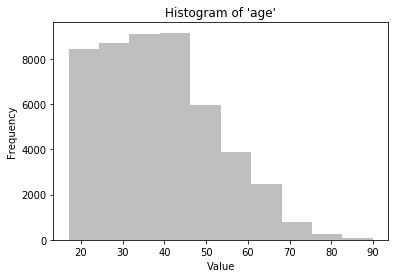

In [23]:
plot_histogram(X["age"])

In [24]:
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha = 0.5, label = "DV=0")
    plt.hist(list(x[y==1]), alpha = 0.5, label = "DV=1")
    plt.title("Histogram of '{var_name}' by DV Category".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc = "upper right")
    plt.show()

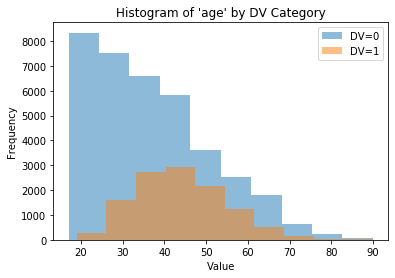

In [25]:
plot_histogram_dv(X["age"],y)

In [26]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only= True, include_bias = False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis = 1)
    
    return df

In [27]:
X = add_interactions(X)
print(X.head(5))

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  25.0  226802.0              7.0           0.0           0.0   
1  38.0   89814.0              9.0           0.0           0.0   
2  28.0  336951.0             12.0           0.0           0.0   
3  44.0  160323.0             10.0        7688.0           0.0   
4  18.0  103497.0             10.0           0.0           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            40.0          0.0                    0.0                  0.0   
1            50.0          0.0                    0.0                  0.0   
2            40.0          0.0                    0.0                  1.0   
3            40.0          0.0                    0.0                  0.0   
4            30.0          1.0                    0.0                  0.0   

   workclass_Never-worked  ...  race_Other_native-country_United-States  \
0                     0.0  ...                             

In [28]:
print(df.shape)
print(X.shape)

(48842, 15)
(48842, 1891)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 1)

In [30]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k = 20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 350  663  824  829  835  992 1127 1164 1208 1315 1324 1327 1437 1628
 1632] are constant.
  UserWarning)
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [31]:
X_train = X_train_selected
X_test = X_test_selected

In [32]:
# >> FEATURE SELECTION << #
def remove_correlated_features(X):
    corr_threshold = 0.9
    corr = X.corr()
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped

In [33]:
def remove_less_significant_features(X, Y):
    sl = 0.05
    regression_ols = None
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped

In [34]:
# >> MODEL TRAINING << #
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [35]:
# I haven't tested it but this same function should work for
# vanilla and mini-batch gradient descent as well

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.int64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw

In [36]:
def sgd(features, outputs):
    max_epochs = 2000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights


In [37]:
def init():
    # filter features
    #remove_correlated_features(X)
    #remove_less_significant_features(X, y)

    # normalize data for better convergence and to prevent overflow
    #X_normalized = MinMaxScaler().fit_transform(X.values)
    #X = pd.DataFrame(X_normalized)

    # insert 1 in every row for intercept b
    #X.insert(loc=len(X.columns), column='intercept', value=1)

    # split data into train and test set
    #print("splitting dataset into train and test sets...")
    #X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
    # filter features
    print("training started...")
    W = sgd(X_train.to_numpy(), y_train.to_numpy())
    print("training finished.")
    print("weights are: {}".format(W))

    # testing the model
    print("testing the model...")
    y_train_predicted = np.array([])
    for i in range(X_train.shape[0]):
        yp = np.sign(np.dot(X_train.to_numpy()[i], W))
        y_train_predicted = np.append(y_train_predicted, yp)

    y_test_predicted = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(X_test.to_numpy()[i], W))
        y_test_predicted = np.append(y_test_predicted, yp)

    print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
    print("recall on test dataset: {}".format(recall_score(y_test, y_test_predicted)))
    print("precision on test dataset: {}".format(precision_score(y_test, y_test_predicted)))
    

# set hyper-parameters and call init
regularization_strength = 10000
learning_rate = 0.000001
init()

training started...
Epoch is: 1 and Cost is: 3075429.1431058142
Epoch is: 2 and Cost is: 2872669.357126751
Epoch is: 4 and Cost is: 2506466.8721864363
Epoch is: 8 and Cost is: 1908499.9404813761
Epoch is: 16 and Cost is: 1107599.5862656601
Epoch is: 32 and Cost is: 375955.27269470715
Epoch is: 64 and Cost is: 48919.062152382605
Epoch is: 128 and Cost is: 8136.653480231602
Epoch is: 256 and Cost is: 7617.447528363873
Epoch is: 512 and Cost is: 7617.3630749328095
training finished.
weights are: [5.36323037e-04 2.49903833e-10 2.49903833e-10 3.27156923e-02
 1.42445185e-08 1.42445185e-08 4.52930706e-05 4.52930706e-05
 2.14529215e-02 3.24874983e-09 3.24874983e-09 9.99615334e-09
 9.99615334e-09 2.49903833e-10 2.49903833e-10 2.49903833e-10
 2.49903833e-10 2.49903833e-10 2.49903833e-10 2.49903833e-10]
testing the model...
accuracy on test dataset: 0.2416569985668464
recall on test dataset: 1.0
precision on test dataset: 0.2416569985668464
